# Algoritmos de detección de comunidades


A continuación, se detallan algunos algoritmos de detección de comunidades. Es necesario prestar atención a las características de las funciones que implementan los algoritmos, ya que el output de las mismas suele variar.

# Instalamos e importamos librerías

In [4]:
!pip install python-louvain
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Using cached pycairo-1.19.1.tar.gz (205 kB)
  Running setup.py clean for pycairo
Failed to build pycairo
    Running setup.py install for pycairo: started
    Running setup.py install for pycairo: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\luna\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Luna\\AppData\\Local\\Temp\\pip-install-5hky5e3b\\pycairo\\setup.py'"'"'; __file__='"'"'C:\\Users\\Luna\\AppData\\Local\\Temp\\pip-install-5hky5e3b\\pycairo\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Luna\AppData\Local\Temp\pip-wheel-v8x242a8'
       cwd: C:\Users\Luna\AppData\Local\Temp\pip-install-5hky5e3b\pycairo\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\cairo
  copying cairo\__init__.py -> build\lib.win-amd64-3.7\cairo
  copying cairo\__init__.pyi -> build\lib.win-amd64-3.7\cairo
  copying cairo\py.typed -> build\lib.win-amd64-3.7

In [2]:
import networkx as nx # Para redes en general
import community as community_louvain # Importo el paquete que instalé en la línea de arriba
import igraph as ig # Importo igraph
import matplotlib.pylab as plt # Para graficar networkx y demases
import matplotlib.cm as cm # para mapas de colores
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as mis # Función para calcular información mutua
import cairo # Importo Cairo
# Esto es para que funcione Cairo
from google.colab import files
from IPython.display import SVG, display, Image
def show_svg(file):
    display(SVG(filename=file))

ModuleNotFoundError: No module named 'community'

# Cargamos las redes directamente de la página de la materia

In [0]:
# Primero, uso de los códigos subidos al cuaderno colaborativo para conseguir los datos del ejercicio
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
url = "http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC04_ComunidadesData.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in archivos:
           if archivo.endswith('.txt') or archivo.endswith('.gml') or archivo.endswith('.csv'):
               zfile.extract(archivo, '/content')


# Ejercicio 1

### Cargamos la red de delfines

graficamos guardando las posiciones para comparar las diferentes particiones en comunidades

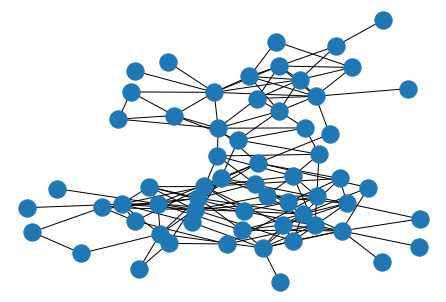

In [0]:
Red_delfines = nx.read_gml('/content/dolphins.gml')
posiciones = nx.kamada_kawai_layout(Red_delfines)
nx.draw(Red_delfines, pos = posiciones)

### Definimos la red en Igraph desde la red en Networkx

In [0]:
Red_delfines_igraph = ig.Graph.TupleList(Red_delfines.edges(), directed=False)

## Calculamos los dendrogramas usando Edge_Betweenness y Fast_Greedy

Están en una variable especial de Igraph, *Dendrogram*

In [0]:
dendograma_edge_betweenness = Red_delfines_igraph.community_edge_betweenness(clusters=None, directed=False, weights=None)

dendograma_fast_greedy = Red_delfines_igraph.community_fastgreedy(weights=None)
print(dendograma_fast_greedy)
print('La partición de Modularidad optima tiene '+str(dendograma_fast_greedy.optimal_count)+' comunidades')
print('Así vemos las comunidades:')
print(dendograma_fast_greedy.as_clustering())

Dendrogram, 62 elements, 61 merges
La partición de Modularidad optima tiene 4 comunidades
Así vemos las comunidades:
Clustering with 62 elements and 4 clusters
[0] Beak, Fish, Grin, SN9, SN96, TR77, Oscar, Bumper, Thumper, Zipfel,
    Kringel, SN4, Fork, Scabs, Hook, Shmuddel, SN63, Stripes, TR99, TSN103,
    TR88, Whitetip, TR120, TSN83
[1] Haecksel, CCL, Double, Zap, Cross, Trigger, Topless, Patchback, Five,
    MN83, Jonah, Vau, MN105, MN60, SMN5
[2] Beescratch, Jet, Knit, Notch, Number1, SN90, Upbang, DN16, Feather,
    Gallatin, Wave, Web, DN21, DN63, PL, Ripplefluke, MN23, Mus, Quasi, Zig,
    TR82
[3] SN100, SN89


## Graficamos los dendrogramas

Se grafican usando Cairo

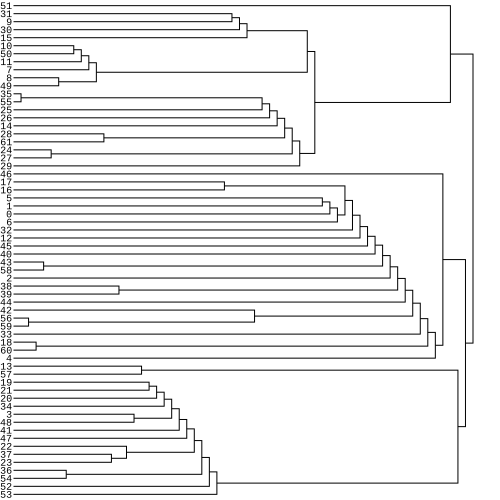

In [0]:
def graficar_dendograma(dendograma):
  with cairo.SVGSurface("example.svg", 500, 500) as surface:
      context = cairo.Context(surface)
      dendograma.__plot__(context, ig.BoundingBox(0, 0, 500, 500), ig.Palette._get)
  show_svg("example.svg")

graficar_dendograma(dendograma_fast_greedy)

## Convertir dendrogramas a partición en comunidades

Funcion de igraph, si le pongo un número, devuelve la particion con esa cantidad de comunidades, el tipo de variable se llama *Clustering*

In [0]:
particion_fast_greedy_igraph = dendograma_fast_greedy.as_clustering(3)
print(particion_fast_greedy_igraph)

Clustering with 62 elements and 3 clusters
[0] Beak, Fish, Grin, SN9, SN96, TR77, Oscar, Bumper, Thumper, Zipfel,
    Kringel, SN4, Fork, Scabs, Hook, Shmuddel, SN63, Stripes, TR99, TSN103,
    TR88, Whitetip, TR120, TSN83
[1] Haecksel, SN100, CCL, Double, Zap, Cross, Trigger, Topless, Patchback,
    Five, MN83, Jonah, Vau, MN105, MN60, SMN5, SN89
[2] Beescratch, Jet, Knit, Notch, Number1, SN90, Upbang, DN16, Feather,
    Gallatin, Wave, Web, DN21, DN63, PL, Ripplefluke, MN23, Mus, Quasi, Zig,
    TR82


In [0]:
particion_fast_greedy_igraph = dendograma_fast_greedy.as_clustering(8)
print(particion_fast_greedy_igraph)

Clustering with 62 elements and 8 clusters
[0] Beak, Fish, Grin, SN96, TR77, Oscar, Bumper, Thumper, Kringel, SN4, Fork,
    Scabs, Hook, Shmuddel, SN63, Stripes, TR99, TR88, Whitetip, TR120
[1] Haecksel, CCL, Double, Zap, Cross, Trigger, Topless, Patchback, Five,
    MN83, Jonah, Vau, MN105, MN60, SMN5
[2] SN9
[3] Beescratch, Jet, Knit, Notch, Number1, SN90, Upbang, DN16, Feather,
    Gallatin, Wave, Web, DN21, DN63, PL, Ripplefluke, MN23, Mus, Zig, TR82
[4] SN100, SN89
[5] Zipfel, TSN83
[6] TSN103
[7] Quasi


#### Si no le pongo nada, delvuelve la que maximiza la modularidad

In [0]:
particion_fast_greedy_igraph = dendograma_fast_greedy.as_clustering()
print(particion_fast_greedy_igraph)

Clustering with 62 elements and 4 clusters
[0] Beak, Fish, Grin, SN9, SN96, TR77, Oscar, Bumper, Thumper, Zipfel,
    Kringel, SN4, Fork, Scabs, Hook, Shmuddel, SN63, Stripes, TR99, TSN103,
    TR88, Whitetip, TR120, TSN83
[1] Haecksel, CCL, Double, Zap, Cross, Trigger, Topless, Patchback, Five,
    MN83, Jonah, Vau, MN105, MN60, SMN5
[2] Beescratch, Jet, Knit, Notch, Number1, SN90, Upbang, DN16, Feather,
    Gallatin, Wave, Web, DN21, DN63, PL, Ripplefluke, MN23, Mus, Quasi, Zig,
    TR82
[3] SN100, SN89


## Detectar comunidades usando Infomap
Infomap no da un dendrograma, directamente obtenemos una variable tipo *Clustering*

In [0]:
# Detectar comunidades usando infomap
particion_infomap_igraph = Red_delfines_igraph.community_infomap()
print(particion_infomap_igraph)

Clustering with 62 elements and 6 clusters
[0] Beak, Fish, SN96, TR77, Bumper
[1] Grin, SN9, Thumper, Zipfel, Kringel, SN4, Fork, Scabs, Hook, Shmuddel,
    SN63, Stripes, TR99, TSN103, TR88, Whitetip, TR120, TSN83
[2] Haecksel, Cross, Trigger, Topless, Patchback, Five, MN83, Jonah, Vau,
    MN105, MN60, SMN5
[3] Beescratch, Knit, Notch, Number1, Oscar, DN63, PL, Mus
[4] Jet, SN90, Upbang, DN16, Feather, Gallatin, Wave, Web, DN21, Ripplefluke,
    MN23, Quasi, Zig, TR82
[5] SN100, CCL, Double, Zap, SN89


## Detectar comunidades usando Louvin
A esta funcion podemos entrar directamente con una red de Networkx, y nos delvuelve la partición como un diccionario donde los keys son los nodos y los values el número de comunidad a la que pertenecen.

In [0]:
# Detectar comunidades usando louvain
particion_louvain = community_louvain.best_partition(Red_delfines)
print(particion_louvain) # Devuelve la info como un diccionario {nodo:comunidad}

{'Beak': 0, 'Beescratch': 1, 'Bumper': 0, 'CCL': 2, 'Cross': 3, 'DN16': 1, 'DN21': 1, 'DN63': 1, 'Double': 2, 'Feather': 1, 'Fish': 0, 'Five': 3, 'Fork': 4, 'Gallatin': 1, 'Grin': 4, 'Haecksel': 3, 'Hook': 4, 'Jet': 1, 'Jonah': 3, 'Knit': 1, 'Kringel': 4, 'MN105': 3, 'MN23': 1, 'MN60': 3, 'MN83': 3, 'Mus': 1, 'Notch': 1, 'Number1': 1, 'Oscar': 0, 'Patchback': 3, 'PL': 0, 'Quasi': 1, 'Ripplefluke': 1, 'Scabs': 4, 'Shmuddel': 4, 'SMN5': 3, 'SN100': 2, 'SN4': 4, 'SN63': 4, 'SN89': 2, 'SN9': 4, 'SN90': 1, 'SN96': 0, 'Stripes': 4, 'Thumper': 4, 'Topless': 3, 'TR120': 4, 'TR77': 0, 'TR82': 1, 'TR88': 4, 'TR99': 4, 'Trigger': 3, 'TSN103': 4, 'TSN83': 4, 'Upbang': 1, 'Vau': 3, 'Wave': 1, 'Web': 1, 'Whitetip': 4, 'Zap': 2, 'Zig': 1, 'Zipfel': 4}


## Para unificar formatos, definamos funciones que pasen de variables tipo *Clustering* a *diccionarios*.

In [0]:
# Función que toma la Red de igraph y la partición calculada con Igraph, y la devuelve como diccionario
def convertir_particion_igraph_a_diccionario(Red_igraph,particion_igraph):
  particion_dict = {}
  for cluster in range(len(particion_igraph)):
    for nodo in Red_igraph.vs(particion_igraph[cluster])['name']:
      particion_dict.update({nodo:cluster})
  return particion_dict

In [0]:
print('Particion antes:')
print(particion_infomap_igraph)
particion_infomap = convertir_particion_igraph_a_diccionario(Red_delfines_igraph,particion_infomap_igraph)
print('Particion ahora:')
print(particion_infomap)

Particion antes:
Clustering with 62 elements and 6 clusters
[0] Beak, Fish, SN96, TR77, Bumper
[1] Grin, SN9, Thumper, Zipfel, Kringel, SN4, Fork, Scabs, Hook, Shmuddel,
    SN63, Stripes, TR99, TSN103, TR88, Whitetip, TR120, TSN83
[2] Haecksel, Cross, Trigger, Topless, Patchback, Five, MN83, Jonah, Vau,
    MN105, MN60, SMN5
[3] Beescratch, Knit, Notch, Number1, Oscar, DN63, PL, Mus
[4] Jet, SN90, Upbang, DN16, Feather, Gallatin, Wave, Web, DN21, Ripplefluke,
    MN23, Quasi, Zig, TR82
[5] SN100, CCL, Double, Zap, SN89
Particion ahora:
{'Beak': 0, 'Fish': 0, 'SN96': 0, 'TR77': 0, 'Bumper': 0, 'Grin': 1, 'SN9': 1, 'Thumper': 1, 'Zipfel': 1, 'Kringel': 1, 'SN4': 1, 'Fork': 1, 'Scabs': 1, 'Hook': 1, 'Shmuddel': 1, 'SN63': 1, 'Stripes': 1, 'TR99': 1, 'TSN103': 1, 'TR88': 1, 'Whitetip': 1, 'TR120': 1, 'TSN83': 1, 'Haecksel': 2, 'Cross': 2, 'Trigger': 2, 'Topless': 2, 'Patchback': 2, 'Five': 2, 'MN83': 2, 'Jonah': 2, 'Vau': 2, 'MN105': 2, 'MN60': 2, 'SMN5': 2, 'Beescratch': 3, 'Knit': 3, 'N

## Graficar particiones
Vamos a graficar las redes coloreando igual los nodos que pertenecen a la misma comunidad.
Es importante graficar los nodos siempre en la misma posicion, para comparar distintas particiones.

### La función toma la Red, la particion y las posiciones de los nodos

In [0]:
def graficar_particion(Red,particion_diccionario,posiciones):
  cmap = cm.get_cmap('viridis', max(particion_diccionario.values())) # viridis es el mapa de colores
  # grafico los nodos
  nx.draw_networkx_nodes(Red, posiciones, particion_diccionario.keys(), node_size=200,
                        cmap=cmap, node_color=list(particion_diccionario.values()), with_labels = False)
  # grafico los enlaces aparte
  nx.draw_networkx_edges(Red,pos = posiciones, alpha=0.5)

In [0]:
# Así obtenemos las posiciones, podríamos elegir otro layout
posiciones = nx.kamada_kawai_layout(Red_delfines)

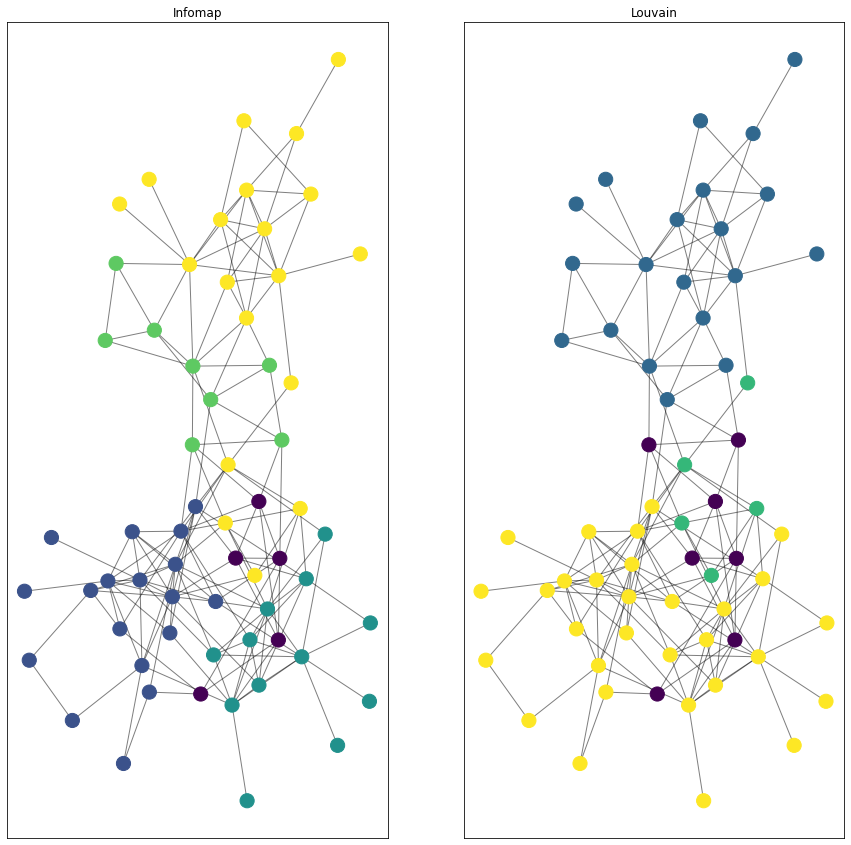

In [0]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Infomap')
graficar_particion(Red_delfines,particion_infomap,posiciones)
plt.subplot(1,2,2)
plt.title('Louvain')
graficar_particion(Red_delfines,particion_louvain,posiciones)

## Silhouette

Vamos a definir manualmente la función para calcular y graficar Silhouette

In [0]:
def silhouette(Red,particion): # La función nos pide la Red y la partición como diccionario
  S=[]
  limites=[0]
  # Recorro los clusters sin repetir
  for cluster in set(particion.values()): 
    #Filtro los nodos que pertenecen a este cluster
    nodos_en_cluster = [nodo for (nodo, value) in particion.items() if value == cluster] 
    S_cluster=[]
    # Recorro los nodos del cluster
    for nodo in nodos_en_cluster:
      distancias_dentro=[]
      distancias_fuera=[]
      # Recorro los nodos del mismo cluster
      for nodo_en_cluster in nodos_en_cluster:
        if nodo != nodo_en_cluster:
          # Calculo y guardo la distancia, si no es consigo mismo
          distancias_dentro.append(nx.shortest_path_length(Red, source=nodo, target=nodo_en_cluster, weight=None))
      # Recorro los nodos de los otros clusters
      for nodo_fuera in Red.nodes():
        if particion[nodo_fuera] != cluster:
          # Calculo y guardo la distancia
          distancias_fuera.append(nx.shortest_path_length(Red, source=nodo, target=nodo_fuera, weight=None)) 
      # Calculo la distancia media para los del mismo cluster
      distancia_media_dentro=np.mean(distancias_dentro)
      # Calculo la distancia mínima para los nodos fuera del cluster
      distancia_min_fuera=np.min(distancias_fuera)
      # Calculo y guardo la Silhouette del nodo
      S_cluster.append((distancia_min_fuera-distancia_media_dentro)/np.max([distancia_min_fuera,distancia_media_dentro]))
    # Ordeno las Silhouette del mismo cluster por valor, para graficar lindo
    S_cluster=sorted(S_cluster)
    # Me guardo en qué nodo termina cada cluster, para graficar clusters por colores
    limites.append(len(S_cluster)+limites[-1])
    # Agrego las Silhouette de este cluster a la lista de todas
    S = S + S_cluster
  # Calculo la Silhouette media
  S_media = np.mean(S)
  # Grafico todas con colores por clusters
  for i in range(len(limites)-1):
    plt.plot(range(limites[i],limites[i+1]),S[limites[i]:limites[i+1]])
  plt.plot(range(0,limites[-1]),S_media*np.ones(limites[-1]))
  return S,S_media

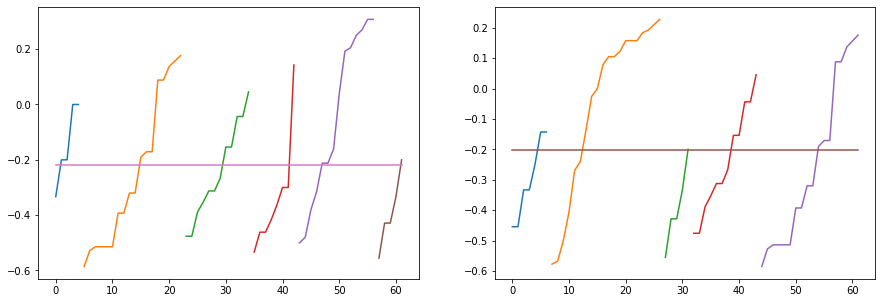

In [0]:
Red=Red_delfines
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
particion=particion_infomap
S,S_media = silhouette(Red,particion)
plt.subplot(1,2,2)
particion=particion_louvain
S,S_media = silhouette(Red,particion)

## Información Mutua
Para la función que calcula info mutua, tenemos que dar las dos particiones, en forma de arrays donde el lugar indica el nodo.

In [0]:
# Función que toma los diccionarios de las particiones y los pasa a arrays
# manteniendo el orden de los nodos
def info_mutua(particion_1,particion_2):
  info_1 = []
  info_2 = []
  for nodo in Red.nodes():
    info_1.append(particion_1[nodo])
    info_2.append(particion_2[nodo])
  info_1 = np.array(info_1)
  info_2 = np.array(info_2)
  return mis(info_1, info_2, average_method='arithmetic') #Esta es la función que calcula info mutua

In [0]:
particion_1 = particion_louvain
particion_2 = particion_infomap
print(info_mutua(particion_1,particion_2))

0.8937885682597623


# Ejercicio 3

## Vamos a importar la base de datos de genes como una *DataFrame* de la librería Pandas

In [0]:
import pandas as pd

## Tenemos tiras de valores de cada gen en función del tiempo

In [0]:
Data_genes = pd.read_csv('geneX.csv')
Data_genes = Data_genes.T

headers = Data_genes.iloc[0]
Data_genes  = pd.DataFrame(Data_genes.values[1:], columns=headers)
Data_genes

Unnamed: 0,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,AT1G05690,AT1G06040,AT1G06460,AT1G06570,AT1G07050,AT1G07180,AT1G08650,AT1G10370,AT1G10550,AT1G10760,AT1G11080,AT1G11210,AT1G13080,AT1G13300,AT1G13420,AT1G13650,AT1G13930,AT1G14120,AT1G14280,AT1G15210,AT1G15830,AT1G16730,AT1G16850,AT1G17180,AT1G17665,AT1G18330,AT1G18460,AT1G18870,AT1G19310,AT1G19450,...,AT5G47330,AT5G47560,AT5G47610,AT5G47990,AT5G48490,AT5G48850,AT5G49015,AT5G49360,AT5G49480,AT5G49730,AT5G51060,AT5G51720,AT5G52310,AT5G52570,AT5G53970,AT5G54130,AT5G54470,AT5G56544,AT5G56550,AT5G56870,AT5G57345,AT5G57630,AT5G57660,AT5G58120,AT5G58770,AT5G60100,AT5G61440,AT5G62360,AT5G62430,AT5G62480,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
0,10.3177,6.71991,3.14961,7.09905,2.90544,0.180219,4.98051,5.61062,2.18523,2.49828,4.0837,8.57741,5.27985,7.16607,1.08068,7.55922,4.72343,7.12041,2.08479,6.68221,3.77726,3.38991,4.25545,0.568395,1.0156,4.32936,6.70228,2.29974,6.40011,3.56917,3.72866,4.62904,0.447827,0.153424,0.08063,4.39507,5.92847,1.00527,1.31611,7.35908,...,0.366146,8.45156,6.46815,0.806417,5.07262,-0.189129,0.28036,8.2776,8.13204,7.24692,1.49808,5.66756,5.69232,7.71545,7.86742,7.67337,6.25852,-0.38994,0.755035,5.59614,7.16399,3.30832,6.96999,5.52652,6.18846,0.367798,0.525699,-0.200037,5.65753,1.29545,6.99951,3.08816,2.29683,7.24309,9.01235,2.07533,2.0549,3.24279,9.05761,4.58374
1,7.656,4.59136,5.03654,3.22519,4.11943,3.24193,2.0708,6.82274,4.19964,2.99923,2.39277,7.95706,7.17764,5.75182,3.4972,7.56873,4.75401,8.49113,0.264802,9.3301,0.764372,4.00051,3.99665,0.761065,1.3855,4.23715,9.54972,1.18118,4.80679,2.80786,2.14168,4.16259,2.98375,1.90016,1.99642,5.80772,4.78388,4.20181,2.63111,8.11819,...,2.81485,6.53392,3.65278,1.68876,4.15791,2.02106,3.05799,4.23069,7.73537,5.88829,1.74766,5.42091,10.6392,5.2429,6.38423,4.63149,3.95343,-0.467133,0.461909,2.23917,6.86313,4.4737,6.61129,3.06226,5.55907,3.04982,1.12399,3.90652,4.61256,0.905114,4.01816,2.45866,2.58563,7.45613,7.12193,3.98826,2.58178,2.99963,9.18014,2.9426
2,3.39994,3.40701,4.74579,0.087514,2.19552,3.0866,1.33383,3.57243,4.40338,2.82956,1.25174,6.68979,8.37772,3.7729,6.52926,6.22217,3.91742,6.16055,-0.344916,10.6334,0.574612,5.40838,1.80051,1.11464,0.667228,2.89113,10.492,0.0817762,2.9158,2.27919,0.669647,2.43943,5.25898,1.73387,5.53709,4.0746,3.43024,4.78,3.28959,6.01754,...,3.22506,3.74682,2.86484,0.18148,2.39501,2.10038,3.78283,3.17516,5.34394,4.79797,0.976865,5.39525,11.5118,1.90351,3.87475,2.91115,1.21593,0.136025,1.87223,2.96305,6.52014,7.03215,5.64691,1.97043,2.63787,5.66578,2.12734,6.19002,2.67718,-0.394468,3.19704,2.00763,2.52892,5.85326,6.75871,3.89683,1.48513,0.596339,8.4646,0.827276
3,1.30679,5.91999,3.60563,0.660912,4.72639,1.70255,2.81404,0.886024,6.00704,4.57939,1.49817,5.69198,6.92687,3.59071,5.40354,4.15573,3.18709,6.26655,1.7577,10.0418,2.63226,3.55374,2.03474,3.05125,2.21364,1.48786,9.45369,2.27417,3.15233,4.98309,-0.470595,1.66681,4.33294,5.24443,3.72276,2.13607,3.68118,3.4171,2.76386,5.24725,...,2.06217,5.149,3.96049,3.53546,2.13607,4.09463,2.61382,3.04908,6.24386,4.87862,3.91606,3.84535,8.93534,0.853378,4.17487,3.75958,0.33995,1.44675,3.4932,4.47467,5.07955,5.23326,3.88899,3.52365,2.43747,4.74289,4.26625,2.39417,2.415,1.80691,4.84071,5.18964,5.56819,4.3807,7.31406,2.90331,4.6848,-0.888935,6.9036,1.24688
4,5.35535,5.58896,3.10787,1.43644,4.97039,1.50136,4.3383,1.54448,2.97146,3.77576,2.16116,3.91761,5.75752,3.84375,3.3915,4.63026,2.34311,5.99035,2.4414,9.27329,3.05703,1.70413,3.70951,3.55806,2.46501,1.79364,8.43296,1.61751,4.12231,4.64035,0.126979,1.73931,2.99671,4.32044,3.94808,1.27196,4.4563,2.73746,1.74363,6.34812,...,1.0795,6.38472,4.73716,3.20512,4.04782,0.796928,1.69635,4.26371,6.30775,6.6133,3.1169,3.94518,6.40237,1.83774,4.63592,4.77791,0.254404,1.71226,3.38431,4.47856,4.93465,3.80845,2.04642,3.63596,2.26064,2.8396,3.98623,2.01358,2.52462,1.63132,5.1278,4.25205,4.94845,0.72165

## Así puedo iterar sobre las columnas del *DataFrame*

In [0]:
for gen in Data_genes:
  print(Data_genes[gen])

0     10.3177
1       7.656
2     3.39994
3     1.30679
4     5.35535
5     9.00847
6      9.8852
7     7.18594
8     3.05036
9     1.70775
10    5.18536
11    9.02459
Name: AT1G01060, dtype: object


## Correlación entre columnas de un *DataFrame*

In [0]:
Data_genes = Data_genes.astype(float)
correlaciones = Data_genes.corr(method='pearson', min_periods=1) 
correlaciones.set_index([correlaciones.iloc[0], correlaciones.columns[0]])
correlaciones

Unnamed: 0,AT1G01060,AT1G01120,AT1G01500,AT1G01520,AT1G01580,AT1G02460,AT1G02640,AT1G02820,AT1G04770,AT1G05260,AT1G05690,AT1G06040,AT1G06460,AT1G06570,AT1G07050,AT1G07180,AT1G08650,AT1G10370,AT1G10550,AT1G10760,AT1G11080,AT1G11210,AT1G13080,AT1G13300,AT1G13420,AT1G13650,AT1G13930,AT1G14120,AT1G14280,AT1G15210,AT1G15830,AT1G16730,AT1G16850,AT1G17180,AT1G17665,AT1G18330,AT1G18460,AT1G18870,AT1G19310,AT1G19450,...,AT5G47330,AT5G47560,AT5G47610,AT5G47990,AT5G48490,AT5G48850,AT5G49015,AT5G49360,AT5G49480,AT5G49730,AT5G51060,AT5G51720,AT5G52310,AT5G52570,AT5G53970,AT5G54130,AT5G54470,AT5G56544,AT5G56550,AT5G56870,AT5G57345,AT5G57630,AT5G57660,AT5G58120,AT5G58770,AT5G60100,AT5G61440,AT5G62360,AT5G62430,AT5G62480,AT5G63160,AT5G63600,AT5G64100,AT5G64170,AT5G65010,AT5G66400,AT5G66690,AT5G66740,AT5G67030,AT5G67140
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT1G01060,1.000000,0.231979,-0.428733,0.916169,0.099693,-0.500882,0.585052,0.751209,-0.757494,-0.165454,0.939953,0.503507,-0.685233,0.879880,-0.898019,0.809147,0.129793,0.603790,-0.007476,-0.876933,0.538266,-0.544443,0.896324,-0.132738,-0.104395,0.832974,-0.776329,0.207061,0.896472,0.009932,0.869547,0.814018,-0.931483,-0.256497,-0.765004,0.395280,0.948471,-0.623761,-0.732525,0.865178,...,-0.572479,0.810083,0.762894,-0.154028,0.803015,-0.742498,-0.716250,0.762753,0.836432,0.815026,-0.027490,0.793051,-0.662931,0.941072,0.899964,0.910157,0.882921,-0.401283,-0.470258,0.200702,0.516322,-0.788214,0.491955,0.569898,0.743991,-0.844337,-0.591823,-0.569986,0.897648,0.419406,0.486510,-0.058897,-0.212455,0.088613,0.580779,-0.548548,-0.089202,0.887143,0.587454,0.888658
AT1G01120,0.231979,1.000000,-0.718595,0.449932,0.220159,-0.777605,0.749436,-0.206206,0.018038,0.169543,0.498279,-0.106143,-0.720070,0.308406,-0.567855,-0.157382,-0.329299,-0.014541,0.826629,-0.561633,0.669832,-0.538705,0.366624,0.304281,0.274164,-0.047763,-0.647553,0.479200,0.580138,0.417337,0.185643,0.060355,-0.392005,0.111839,-0.524016,-0.396921,0.433918,-0.706793,-0.718295,-0.053165,...,-0.683924,0.617704,0.640954,0.354314,0.413310,-0.009225,-0.769066,0.516904,0.394679,0.411871,0.378760,-0.148970,-0.644551,0.320970,0.421410,0.556479,0.213275,0.384109,0.336733,0.579628,-0.327809,-0.652976,-0.248530,0.892936,0.212565,-0.599907,0.275531,-0.886707,0.314692,0.593948,0.884391,0.354795,0.290931,-0.270925,0.556521,-0.568070,0.316805,0.083036,-0.310288,0.394548
AT1G01500,-0.428733,-0.718595,1.000000,-0.465585,-0.083756,0.905592,-0.909657,0.229250,0.423785,0.049670,-0.639583,0.308603,0.908664,-0.231499,0.720101,0.110882,0.685322,0.188557,-0.636418,0.622353,-0.909834,0.858685,-0.584473,-0.623261,-0.031350,-0.029492,0.828045,-0.186139,-0.576954,-0.239000,-0.141442,0.036665,0.550723,-0.081016,0.285558,0.587709,-0.548502,0.821532,0.889580,-0.015697,...,0.913980,-0.701788,-0.759071,-0.144106,-0.651691,0.402004,0.853844,-0.547599,-0.286305,-0.684481,-0.222254,-0.051794,0.919760,-0.323411,-0.356563,-0.713883,-0.187273,-0.536427,-0.494391,-0.718049,0.436289,0.776440,0.337579,-0.782427,0.016112,0.615732,-0.325477,0.780201,-0.326383,-0.579633,-0.874273,-0.158385,-0.226626,0.630899,-0.863570,0.919465,-0.115490,-0.047366,0.359990,-0.307593
AT1G01520,0.916169,0.449932,-0.465585,1.000000,0.037339,-0.645143,0.648223,0.695317,-0.624236,-0.175154,0.955521,0.603033,-0.714676,0.959258,-0.897805,0.749741,0.260481,0.586897,0.115240,-0.958564,0.590913,-0.423977,0.766331,-0.239362,-0.111961,0.748018,-0.841610,0.305389,0.951307,0.020068,0.897747,0.842991,-0.941069,-0.338379,-0.916895,0.382630,0.952466,-0.746930,-0.739617,0.750025,...,-0.625814,0.854428,0.836885,-0.166353,0.719029,-0.589574,-0.813277,0.883762,0.863382,0.766776,-0.025124,0.680021,-0.673539,0.964309,0.960452,0.939296,0.935204,-0.429775,-0.493816,0.338184,0.536027,-0.793505,0.551939,0.743207,0.817796,-0.901317,-0.612134,-0.724806,0.877022,0.436008,0.625006,-0.055497,-0.272643,0.257792,0.580523,-0.508532,-0.109441,0.852967,0.569699,0.972671
AT1G01580,0.0